In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn import metrics

# READ DATA

In [31]:
wine_quality = pd.read_csv('winequality-white.csv', delimiter=';')
wine_quality.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1020,8.6,0.20,0.42,1.5,0.041,35.0,125.0,0.99250,3.11,0.49,11.4,7
1749,6.1,0.17,0.27,1.5,0.056,45.0,135.0,0.99240,3.20,0.43,10.2,6
4050,7.4,0.16,0.27,15.5,0.050,25.0,135.0,0.99840,2.90,0.43,8.7,7
3703,7.5,0.24,0.31,13.1,0.050,26.0,180.0,0.99884,3.05,0.53,9.1,6
3403,8.8,0.27,0.25,5.0,0.024,52.0,99.0,0.99250,2.87,0.49,11.4,5


# Rename column

In [32]:
wine_quality = wine_quality.rename(columns={'fixed acidity': 'Fixed Acidity', 'volatile acidity': 'Volatile Acidity', 'citric acid': 'Citric Acid',
                        'residual sugar': 'Residual Sugar', 'chlorides': 'Chlorides', 'free sulfur dioxide': 'Free Sulfur Dioxide', 'total sulfur dioxide':'Total Sulfur Dioxide',
                        'density': 'Density', 'pH': 'pH', 'sulphates': 'Sulphates', 'alcohol': 'Alcohol', 'quality': 'Quality'})
wine_quality

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# Exploratory Data Analysis (EDA)

## Describe wine data

In [33]:
# Univariate Analysis
wine_quality.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Find null values in data

In [34]:
wine_quality.info()
wine_quality.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed Acidity         4898 non-null   float64
 1   Volatile Acidity      4898 non-null   float64
 2   Citric Acid           4898 non-null   float64
 3   Residual Sugar        4898 non-null   float64
 4   Chlorides             4898 non-null   float64
 5   Free Sulfur Dioxide   4898 non-null   float64
 6   Total Sulfur Dioxide  4898 non-null   float64
 7   Density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   Sulphates             4898 non-null   float64
 10  Alcohol               4898 non-null   float64
 11  Quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Fixed Acidity           False
Volatile Acidity        False
Citric Acid             False
Residual Sugar          False
Chlorides               False
Free Sulfur Dioxide     False
Total Sulfur Dioxide    False
Density                 False
pH                      False
Sulphates               False
Alcohol                 False
Quality                 False
dtype: bool

## Find missing values in data

In [35]:
wine_quality.isna().sum()

Fixed Acidity           0
Volatile Acidity        0
Citric Acid             0
Residual Sugar          0
Chlorides               0
Free Sulfur Dioxide     0
Total Sulfur Dioxide    0
Density                 0
pH                      0
Sulphates               0
Alcohol                 0
Quality                 0
dtype: int64

## Find and del duplicate data

In [36]:
print("Jumlah duplikasi: ", wine_quality.duplicated().sum())

Jumlah duplikasi:  937


In [37]:
wine_quality.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", wine_quality.duplicated().sum())

Jumlah duplikasi:  0


# Building Model

## Preprocess data

In [38]:
feature_columns = wine_quality.columns[:-1]
target_column = 'Quality'
X = wine_quality[feature_columns]
y = (wine_quality[target_column] >= 7).astype(int)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Linear regression

In [39]:
# Splitting dataset into training set & test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [40]:
# Fitting Logistic Regression to the training set
logreg = LogisticRegression(max_iter=10000, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

In [41]:
# Test prediction
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [42]:
# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,2))

Accuracy: 0.81


In [43]:
# AUC Score
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", round(auc,2))

AUC Score: 0.82


In [44]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[590  39]
 [112  52]]


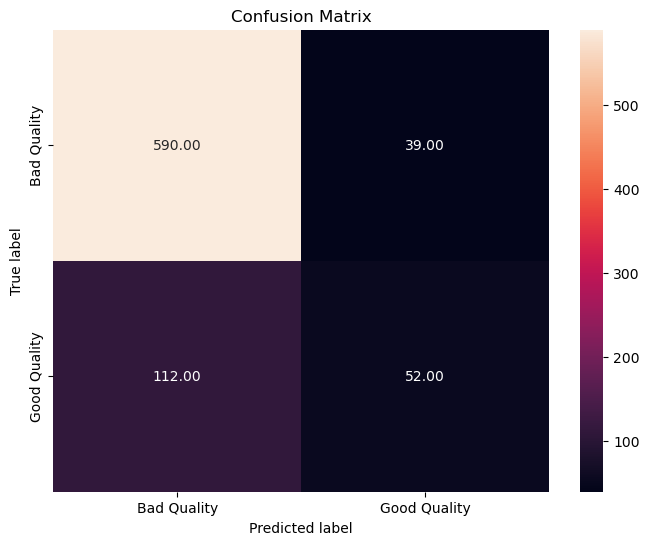

In [45]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=["Bad Quality", "Good Quality"], yticklabels=["Bad Quality", "Good Quality"])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Building Decission Tree

In [46]:
param_grid = {'max_depth': np.arange(3, 10)}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)
tree.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9])})

In [47]:
# Best parameters and best score from GridSearchCV
print("Best Parameters:", tree.best_params_)
print("Best Cross-Validation Score:", tree.best_score_)

Best Parameters: {'max_depth': 3}
Best Cross-Validation Score: 0.8033412530447631


In [48]:
# Build Final Decision Tree Model with the best parameter
clf_tree = DecisionTreeClassifier(max_depth=tree.best_params_['max_depth'])
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [49]:
# Test prediction for Decision Tree
y_pred_tree = clf_tree.predict(X_test)
y_pred_proba_tree = clf_tree.predict_proba(X_test)[:, 1]

In [50]:
# Decision Tree Evaluation
accuracy_tree = metrics.accuracy_score(y_test, y_pred_tree)
print("Accuracy:", accuracy_tree)

Accuracy: 0.8121059268600253


In [51]:
auc_tree = metrics.roc_auc_score(y_test, y_pred_proba_tree)
print("AUC Score:", auc_tree)

AUC Score: 0.7740945752064834


In [52]:
# Confusion Matrix for Decision Tree
cm_tree = metrics.confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix:\n", cm_tree)

Confusion Matrix:
 [[608  21]
 [128  36]]


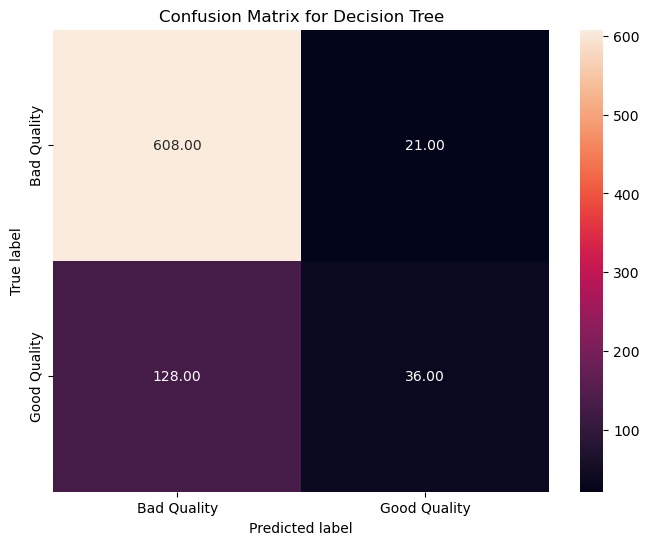

In [53]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='.2f', xticklabels=["Bad Quality", "Good Quality"], yticklabels=["Bad Quality", "Good Quality"])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Conclusion

In [54]:
# Model summary comparison
print(f"Logistic Regression - Accuracy: {accuracy}")
print(f"Logistic Regression - AUC: {auc}")

Logistic Regression - Accuracy: 0.8095838587641866
Logistic Regression - AUC: 0.8164042808949553


In [56]:
print(f"Decision Tree - Accuracy: {accuracy_tree}")
print(f"Decision Tree - AUC Score: {auc_tree}")

Decision Tree - Accuracy: 0.8121059268600253
Decision Tree - AUC Score: 0.7740945752064834
